<h1>DSCI 100 003 - Project Final Report - DANG NGUYEN - 31923584</h1>


# Introduction




## Background
A computer science group at UBC has set up a **Minecraft** server and is recording play sessions to understand how people engage with video games. In doing so, they have created two datasets: one containing player information and another containing past play sessions. The goal of this project is to use the data provided by the Minecraft server to address one of the questions posed by the project lead, **Frank Wood**.

The question I have chosen to focus on is question 1:

> **"What kinds of players are most likely to contribute a large amount of data?" Specifically, I am interested in learning how a player's age might be related to how much data they contribute (i.e. total played hours)."**

I chose this question because I believe it to be the most valuable for the research team. Understanding which players contribute the most data is critical towards the research team as they need players who will contribute more than just demographic data in order to answer the other two questions posed by the group. Essentially, in analyzing and identifying the most valuable player group(s) in terms of data contributed I can help the research team in finding players who will be helpful in answering the other questions.


## Summary of Datasets
The provided data consists of two csv files, 'Players' (9 variables, 196 observations), and 'Sessions' (5 variables, 1535 observations). Both are summarized below.




### Players

| Variable          | Type of Data*         | Interpretation                                   | Options / Other Notes                                                                 |
|:------------------|:----------------------|:-------------------------------------------------|:-------------------------------------------------------------------------------------|
| experience        | categorial - ordinal  | experience level of player, selected by player   | *Beginner, Amateur, Regular, Pro, Veteran*                                            |
| hashedEmail       | character             | email address of player in hashed form           | e.g. f6daba428a5e19a3d47574858c135...                                                |
| name              | character             | pseudonym chosen by player                       | Many options were provided to players. Given this, it makes sense to treat this as character, not factor. |
| gender            | categorial            | gender of player, selected by the player         | *Male, Female, Non-binary, Agender, Two-Spirited, Other, Prefer not to say*          |
| played_hours      | double                | number of hours player has played on server      | e.g. 22.5                                                                            |
| age               | double                | age of player, selected by the player            | e.g. 30                                                                              |
| subscribe         | logical               | whether player subscribed to PlaiCraft updates   | *TRUE, FALSE*                                                                        |

* Represents most appropriate type, not the type initially assigned by R.

### Sessions

| Variable             | Type of Data* | Interpretation                        | Other Notes                                      |
|:---------------------|:--------------|:--------------------------------------|:------------------------------------------------|
| hashed_Email         | character     | email address of player in hashed form| e.g. 50499be23603422e6a0ee97...                 |
| start_time           | character     | date, time Plaicraft session began    | e.g. 30/06/2024 18:12                           |
| end_time             | character     | date, time Plaicraft session finished | e.g. 30/06/2024 18:24                           |
| original_start_time  | double        | UNIX timestamp of session start       | e.g. 1.71977E+12                                |
| original_end_time    | double        | UNIX timestamp of session end         | e.g. 1.71977E+12                                |



# Method & Results

## Loading Data
First, I load the necessary libraries, then read the datasets.

In [10]:
library(tidyverse)
library(tidymodels)
library(repr)

players <- read_csv("Data/players.csv")
sessions <- read_csv("Data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Wrangling & Cleaning Data
Then, I redefine the `experience` and `gender` columns as **factors** using the `as_factor` function, so that these variables will be treated as categorical.

In [12]:
players <- players |>
mutate(experience = as_factor(experience)) |>
mutate(gender = as_factor(gender))

I also create a new `sessions_sum` data frame using`group_by and summarise. This shows me the number of sessions per hashed email, i.e. the number of sessions per individual.

In [13]:
sessions_sum <- sessions |>
group_by(hashedEmail) |>
summarise(number_of_sessions = n())

head(sessions_sum)

hashedEmail,number_of_sessions
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1


**Table 1. Hashed Email & Number of Sessions** <br>
(Only the head is displayed for the sake of readability.)

Next, I bind this data frame with the `players` data frame, using `left_join`. This brings together all required variables. This way, I can use just one data frame for all subsequent analysis steps.

In [14]:
data <- left_join(players, sessions_sum, by = "hashedEmail")

head(data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


**Table 2. Dataframe of all player variables** <br>
(Only the head is displayed for the sake of readability.)

## Data Analysis 1 - Linear Regression
I start my data analysis by setting the seed. Then I split the data into training and testing sets, in a 70:30 ratio.

In [17]:
set.seed(1000) 

data_split <- initial_split(data, prop = 0.7, strata = Age)
data_training <- training(data_split)
data_testing <- testing(data_split)

### Summary of Dataset Relevant For Exploratory Data Analysis
Here I perform a short summary of the data that is relevant for my exploratory data analysis (i.e. `Age`), finding the mean, maximum and minimum age values, and standard deviation.

In [19]:
summary <- data_training |> summarize(mean = mean(Age), median = median(Age), max = max(Age), min = min(Age), standard_deviation = sd(Age))

summary 

mean,median,max,min,standard_deviation
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52985,19,49,8,5.676346


In the training data, I can see the minimum age is 8 years, the maximum age is 49 years. The mean age is 20.5 years, and the median age is 19 years.

Before creating a model, I make a **scatterplot** using `ggplot`, to see if there seems to be a relationship between the `Age` and `played_hours` variables.

#### **Figure 1. Total Playtime vs. Age**

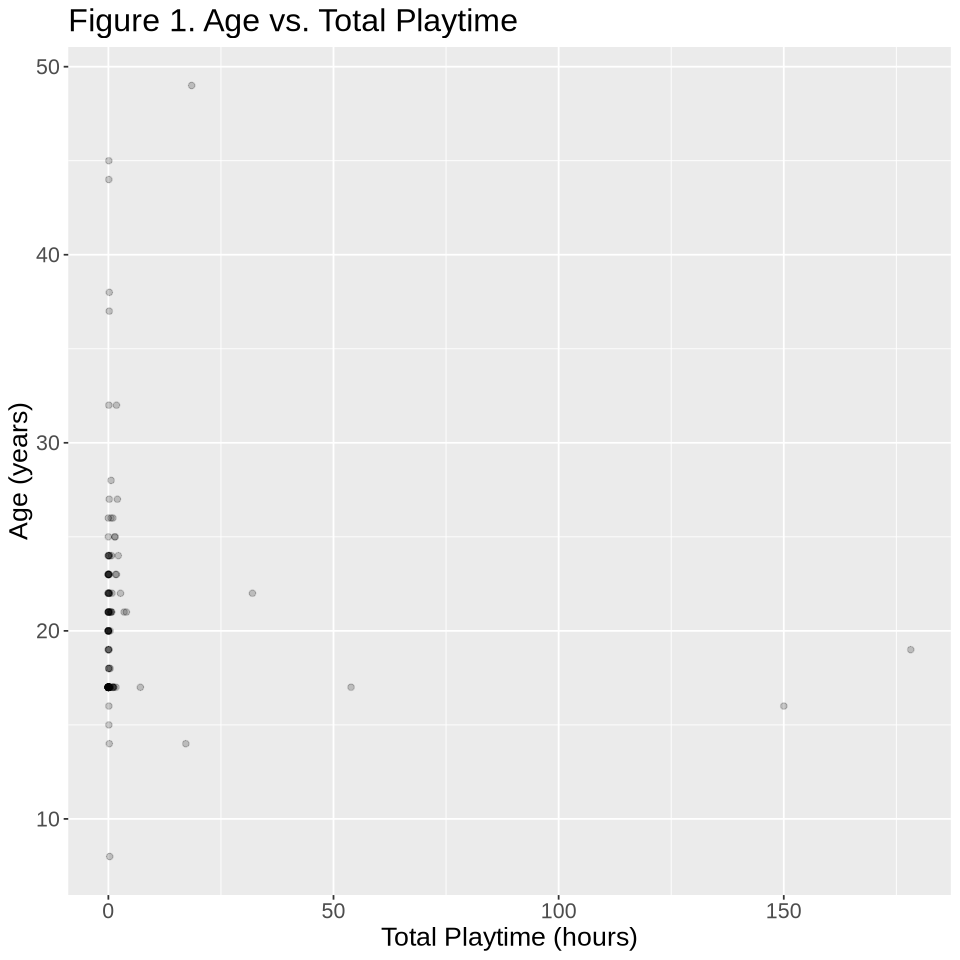

In [20]:
options(repr.plot.width = 8, repr.plot.height = 8)

age_playtime <- data_training |>
ggplot(aes(x = played_hours, y = Age)) +
geom_point(alpha = 0.2) +
labs(x = "Total Playtime (hours)", y = "Age (years)") +
ggtitle("Figure 1. Age vs. Total Playtime") +
theme(text = element_text(size = 16))

age_playtime

From this figure, I can conclude that the training dataset includes mostly players who are young (< 25 years) and play very few or no hours. Among the players that *do* play many hours (e.g. more than 25 hours), all of them are young (< 25 years).

From Figure 1, the relationship between `Age` and `played_hours` is not especially clear, but perhaps it could be flat, weakly linear. There seem to be several outliers, and the majority of players have played 0 hours.

I would like to further explore the relationship between age and played_hours. Since both variables are numeric, and I see a slight indication of a linear relationship, I'll try a linear regression. Since I would like to know the characteristics of players that contribute a large amount of data, I will create a model that predicts age using played_hours. If my model is accurate-- in other words, if the **RMSE** and **RMSPE** are low enough-- I will conclude that player's age can help me to predict their *played hours*.

In this step, I will:

* create a linear regression model specification, named lm_spec
* create a recipe for lm_spec, named data_recipe
* fit the model specification and recipe in a workflow, named data_fit

In [22]:
lm_spec <- linear_reg() |> 
       set_engine("lm") |>
       set_mode("regression")

data_recipe <- recipe(Age ~ played_hours, data = data_training)

data_fit <- workflow() |>
       add_recipe(data_recipe) |>
       add_model(lm_spec) |>
       fit(data = data_training)

data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  played_hours  
    20.57180      -0.01125  




The equation of the line indicates that when played_hours is 0, the predicated age is 20.5 (y-intercept). The slope is roughly 0. The intercept is close to the average age of players, because most players play 0 hours.

Next, I will calculate the **RMSE** to assess the goodness of fit on `data_fit`.
Note that this is going to tell me how well the model predicts the training data used to fit the model.

In [24]:
lm_rmse <- data_fit |>
         predict(data_training) |>
         bind_cols(data_training) |>
         metrics(truth = Age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

lm_rmse

[1] 5.650355

The **RMSE** tells me that the training data points on the scatterplot were off by the above number of years from the line of best fit.

I calculate the **RMSPE** by completing the same process on the **testing data**.

In [27]:
lm_rmspe <- data_fit |>
         predict(data_testing) |>
         bind_cols(data_testing) |>
         metrics(truth = Age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

lm_rmspe

[1] 7.139151

The **RMSPE** tells me that the training data points on the scatterplot were off by an average distance of ~7 years from the line of best fit.

Especially considering the dataset mostly consists of players < 25 years, a 7-year difference in predicted age is substantial. Using `played_hours` as a predictor does not result in an accurate prediction.

The outliers (i.e. points of astonishingly high play times and points of surprisingly advanced age) may contribue to this. I identify them, by ordering the data frame in **descending order** for each variable, using the `arrange` function.

#### **Table 3. All Players, in descending order of `age`**

In [43]:
data_age_desc <- arrange(data, desc(Age))
head(data_age_desc
    )

experience,subscribe,hashedEmail,played_hours,name,gender,Age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Regular,FALSE,7b17513f11968feaf6b02977885c436dc2a4549489ca25ef03022f9fbae19d81,0.0,Balthazar,Male,50,1
Regular,TRUE,c57fa94e436cf49a929d0168e47d26fec3d900b321775e280ef136979c01d5a4,18.5,Dante,Male,49,16
Veteran,FALSE,4c0662a559f9d83b4d84ce3d86e6577c9f7a426c80465c6174321afd96664da5,0.0,Selena,Male,46,NA
Amateur,FALSE,6fa105fac7f4f37350f21830db78cde153d8edda41d6f4f2d48c9785d605c5e5,0.1,Yosef,Male,45,1
Veteran,TRUE,ba24bebe588a34ac546f8559850c65bc90cd9d51b821581bd6e25cff437a1081,0.1,Gabriela,Female,44,1
Beginner,FALSE,5e5c25a773be7a62638a163d773534e575a5ad5782104723e53cb676a30fa60b,0.0,Jude,Female,42,NA
Veteran,TRUE,ca20f724571080b997e0efa874b9611e9f280c1af5f68ff6231a9e5b5d79bcfe,0.2,Edward,Male,38,1
Beginner,FALSE,1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,0.2,Aurora,Female,37,1
Amateur,FALSE,df6a1201c9c638aff1df8aeaf459a5b0a00aa04824936ee0305f5c275352c647,0.0,Vasco,Prefer not to say,33,NA


(Only the head is displayed for the sake of readability.)

#### **Table 4. All Players, in descending order of `played_hours`**

In [47]:
data_playtime_desc <- arrange(data, desc(played_hours))
head(data_playtime_desc)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130


(Only the head is displayed for the sake of readability.)

I can see that players **Balthazar, Dante, Selena, Yosef, Gabriela, Jude, Hiroshi, Akio, Piper and Delara** have either: (1) playtimes that are orders of magnitude higher than most of the players, or (2) a very advanced age, compared to most other players.

I suspect outliers of type (1) could represent e.g. research team members themselves, testing the environment. I only want to include participant player data. I suspect outliers of type (2) may be caused by players entering an inaccurate age or they just have a lot more free time than average people at their ages. These outliers may be affecting our model's accuracy.

I also debated removing zero-contribution players. However, I conclude they represent legitimate cases (e.g. subscribers who haven’t played), so conclude they are relevant to the analysis.

I delete types (1) and (2) from the data frame using the `filter` function.

#### **Table 5. Dataframe of all player data, with outliers removed**

In [45]:
outliers <- c('Balthazar', 'Dante', 'Selena', 'Yosef', 'Gabriela', 'Jude', 'Hiroshi', 'Akio', 'Piper', 'Delara')

ref_data <- filter(data, !name %in% outliers)
head(ref_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,number_of_sessions
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


Using this refined data frame, I will now repeat the entire process (except creating the recipe, since that is identical) and calculate its **RMSE** and **RMSPE**. 

In [48]:
set.seed(1000)

ref_data_split <- initial_split(ref_data, prop = 0.7, strata = Age)
ref_data_training <- training(ref_data_split)
ref_data_testing <- testing(ref_data_split)

ref_data_recipe <- recipe(Age ~ played_hours, data = ref_data_training)

ref_data_fit <- workflow() |>
       add_recipe(ref_data_recipe) |>
       add_model(lm_spec) |>
       fit(data = ref_data_training)

ref_data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  played_hours  
   19.909951     -0.002047  


In [49]:
ref_lm_rmse <- ref_data_fit |>
         predict(ref_data_training) |>
         bind_cols(ref_data_training) |>
         metrics(truth = Age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

ref_lm_rmse

[1] 4.239694

In [50]:
ref_lm_rmspe <- ref_data_fit |>
         predict(ref_data_testing) |>
         bind_cols(ref_data_testing) |>
         metrics(truth = Age, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

ref_lm_rmspe

[1] 4.171485

The calculated **RMSE** and **RMSPE** values are both lower than their values calculated when including the outliers. The value **RMSPE** of 4.17 is slightly more accurate than the earlier of ~7 years.

### Visualization of Linear Regression
Finally, I visualize the linear model I have created, specifically the version without outliers.

#### **Figure 2. Total Playtime vs Player Age**

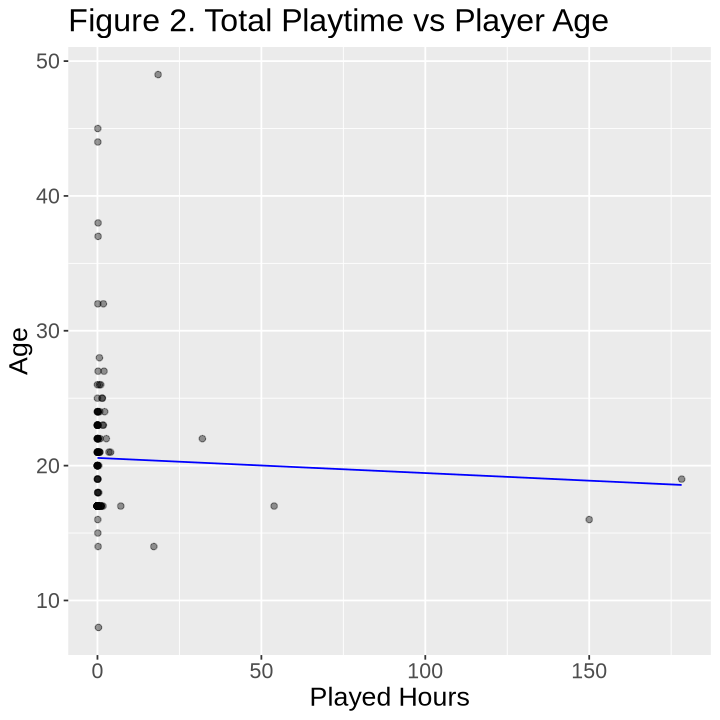

In [51]:
options(repr.plot.width = 6, repr.plot.height = 6)

lm_preds <- data_fit |>
  predict(data_training) |>
  bind_cols(data_training)

lm_predictions <- lm_preds |>
	ggplot(aes(x = played_hours, y = Age)) +
    	geom_point(alpha = 0.4) +
    	geom_line(
        	mapping = aes(x = played_hours, y = .pred),
        	color = "blue") +
    	xlab("Played Hours") +
    	ylab("Age") +
    	theme(text = element_text(size = 16)) +
    	ggtitle("Figure 2. Total Playtime vs Player Age")

lm_predictions

The model with outliers removed performed better than the model with the outliers. However, neither indicate that `playtime` is a good predictor of `Age`. There may be other variables that are better predictors.

It could be the case that `Age` and `played_hours` have a relationship, but it is non-linear. In my next analysis, knn-regression, I will explore this possibility.

## Data Analysis 2 - KNN Regression
Instead of a linear regression, another approach I can take is building a knn-regression model. Re-examining figure 1, the relationship doesn't look especially linear-- the characterics of the data may make a non-linear model a better fit.

We can perform knn regression to predict age based on total played_hours.

First, I’ll need to perform 5-fold cross validation on the training dataset to test for the optimal k.

In [52]:
data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                 set_engine("kknn") |>
                 set_mode("regression")

data_recipe <- recipe(Age ~ played_hours, data = ref_data_training) |>
                   step_scale(all_predictors()) |>
                   step_center(all_predictors())

data_vfold <- vfold_cv(data, v = 5, strata = Age)

data_workflow <- workflow() |>
                     add_recipe(data_recipe) |>
                     add_model(data_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

data_results <- data_workflow |>
                        tune_grid(resamples = data_vfold, grid = gridvals) |>
                        collect_metrics()
head(data_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7.49778229,5,0.846363678,Preprocessor1_Model01
1,rsq,standard,0.02259138,5,0.009852283,Preprocessor1_Model01
2,rmse,standard,6.78827556,5,0.842903949,Preprocessor1_Model02
2,rsq,standard,0.02509744,5,0.012955354,Preprocessor1_Model02
3,rmse,standard,6.68104915,5,0.831744078,Preprocessor1_Model03
3,rsq,standard,0.02435287,5,0.006405990,Preprocessor1_Model03


The optimal k will have the lowest **RMSE** value. Thus, I look for the k value that results in the **minimum rmse**.

In [53]:
data_min <- data_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n=1)

k_min <- data_min |>
            pull(neighbors)
k_min

[1] 10

Now, I can use this k value to train my final model.

In [60]:
data_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors =11) |>
                            set_engine("kknn") |>
                            set_mode("regression")

data_best_fit <- workflow() |>
                        add_recipe(data_recipe) |>
                        add_model(data_best_spec) |>
                        fit(data = ref_data_training)

Next, I use metrics function to evaluate the effectiveness of the model

In [61]:
data_summary <- data_best_fit |> 
                       predict(data_testing) |>
                       bind_cols(data_testing) |>
                       metrics(truth = Age, estimate = .pred)
data_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.07050543
rsq,standard,0.07349853
mae,standard,4.58181818


The **RMSE** is approximately 8.07. This means the average difference between a data point and my line of best fit is 8.07 years.

Similar to the linear model, this model's predications of `Age` based on `played_hours` is not as accurate as I might hope.

### Visualization of KNN Regression
Finally, I visualize the model I have created.

#### **Figure 3. Total Playtime vs Player Age**

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


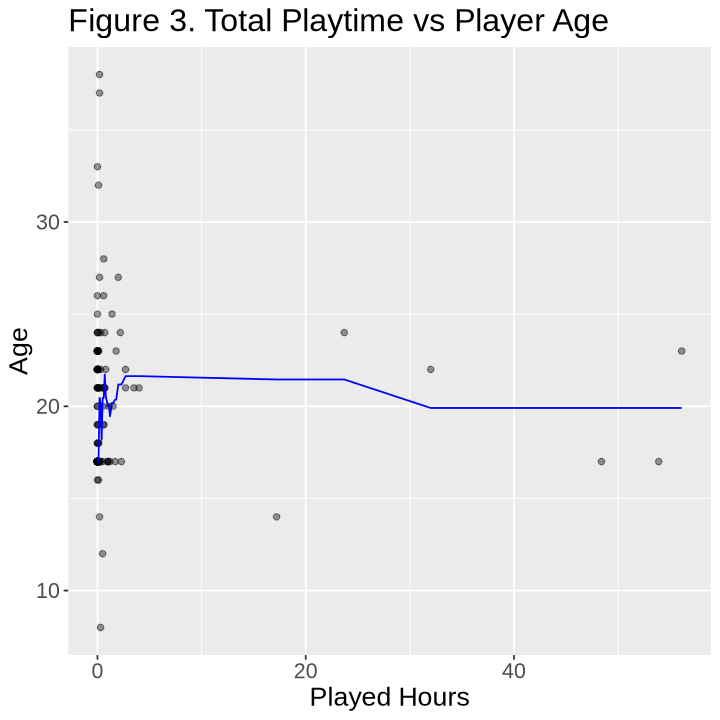

In [62]:
options(repr.plot.width = 6, repr.plot.height = 6)

ref_data_preds <- data_best_fit |>
  predict(ref_data_training) |>
  bind_cols(ref_data_training)

knn_predictions <- ref_data_preds |>
	ggplot(aes(x = played_hours, y = Age)) +
    	geom_point(alpha = 0.4) +
    	geom_line(
        	mapping = aes(x = played_hours, y = .pred),
        	color = "blue") +
    	xlab("Played Hours") +
    	ylab("Age") +
    	theme(text = element_text(size = 16)) +
    	ggtitle("Figure 3. Total Playtime vs Player Age")

knn_predictions

I note some overfitting in the portion of the model, especially for lower numbers of played hours. This indicates my k value is too low. However, a higher k results in a high RMSPE, as calculated above. This conundrum is likely because of the huge number of points at or close to 0, and the relative lack of data points across larger numbers of played hours!

# Discussion


## Summary
In my exploratory data analysis, I plotted `Age` vs `played_hours` (Figure 1). Based on this exploratory analysis, I predicted a linear relationship between the age of the player and the total number of hours played. I created a linear regression model, where the predictor variable was the total number of hours played (played_hours) and the predicted variable was the age of the player (age).

To test the performance of the model, I used the training model to predict age from the test data, and calculated the **RMSPE**. The model had an **RMSPE** of 7.14. My analysis shows there is a weakly negative linear relationship between age and total played hours. Looking back Figure 1, I see that players younger than ~25 years are contributing the most playtime.

When a linear model didn't return a particularily excellent RMSPE, I took a closer look at the exploratory plot, and realized the relationship might not be linear. I then created a knn regression model, which also had a relatively poor RMPSE.

**I conclude that neither model is effective**, because both are based on my very limited data. The limitation from the dataset are discussed below.

## Expectations and Limitations

The results partially aligned with my expectations.

Given that the linear relationship appeared flat and weak in the exploratory analysis, I did not have expectations of a particularly well-fitting model or low RMSPE.

I had concerns about the size of dataset from early on in the project, especially given that a large proportion (85/196) players contributed 0 hours of playtime. A dataset with more representation across a range of played_hours would give me stronger predictive ability! The relationship I observed is likely driven by these 0 hour points, resulting in model slopes that are close to flat, and washing out any other trends I might see.

Additionally, in my analysis, I used only a single predicting variable. Given the limitations in age range in my dataset, this variable was not the best choice. My model was overly simple, and likely did not handle nuances in the data. It could be strengthened by adding a greater number of predictors, assuming these added predictors have predictive power.

## Potential Impact
Understanding demographic details of those who contribute the most playtime can help in targeted recruitment and marketing efforts.

In this case, since I believe younger players (under 25) might contribute the most playtime, the research team can focus efforts on this demographic. For example, the researchers could advertise their study in locations that young adults frequent (e.g. high schools, universities, colleges, relevant subreddits, social media etc.).

The researchers could also focus their development to enhance engagement for younger players. For example, this demographic might find social or competitive elements particularily appealing.

## Future Question
My findings point me to several area of future work. I ask myself "Can I use played_hours to more accurately predict other demographic characteristics of players?"

I suspect it could be interesting to explore subscription status and it's relationship with played hours. From exploratory visualizations in my individual projects, I saw that almost all players with a high level of played_hours subscribe to Plaicraft email updates. Future work could use subscription status to predict number of played hours.

I also expect it could be interesting to explore experience level and it's relationship with played_hours. In my individual exploratory data analyses, I observed that more amateur and regular players have a high number of played_hours compared to other experience levels.